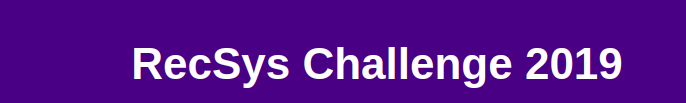

In [47]:
import pandas as pd 
import numpy as np 

# Get data from https://recsys.trivago.cloud/challenge/dataset/

In [48]:
df = pd.read_csv('../data/train.csv')
df.head()

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [49]:
df.shape

(12756503, 13)

### Number of all session id in dataset

In [50]:
all_session_ids = df.session_id.unique()
all_session_ids

array(['aff3928535f48', 'fa3a53156ae5c', '3599a6f709eab', ...,
       '769cb68fc7b05', 'a36f179c4ba60', 'cae8906db6f21'], dtype=object)

In [51]:
num_of_session = len(all_session_ids)
num_of_session

728547

### Get stamp and split data train.csv

In [52]:
stamp = 0.8 

In [53]:
num_train_session = int(stamp * num_of_session)
num_train_session

582837

In [54]:
dftrain_end_session_id = all_session_ids[num_train_session]
dftrain_end_session_id

'2ad068e378c21'

In [55]:
df[df.session_id==dftrain_end_session_id]

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
10200066,10200066,01BJPUWDX4RV,2ad068e378c21,1541101298,1,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200067,10200067,01BJPUWDX4RV,2ad068e378c21,1541101298,2,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200068,10200068,01BJPUWDX4RV,2ad068e378c21,1541101298,3,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200069,10200069,01BJPUWDX4RV,2ad068e378c21,1541101298,4,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200070,10200070,01BJPUWDX4RV,2ad068e378c21,1541101372,5,clickout item,1452183,IN,"Mumbai, India",mobile,NaN,1452183|1787451|99516|7116000|980591|6538530|7...,71|67|72|24|25|33|21|19|25|22|24|22|25|19|24|4...
10200071,10200071,01BJPUWDX4RV,2ad068e378c21,1541101374,6,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200072,10200072,01BJPUWDX4RV,2ad068e378c21,1541101374,7,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200073,10200073,01BJPUWDX4RV,2ad068e378c21,1541101374,8,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200074,10200074,01BJPUWDX4RV,2ad068e378c21,1541101374,9,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN


In [56]:
dftrain_last_index = df[df.session_id==dftrain_end_session_id][-1:].index
dftrain_last_index

Int64Index([10200074], dtype='int64')

In [57]:
dftrain_last_index = int(dftrain_last_index[0])
dftrain_last_index

10200074

### Split dataset to df train and df test

In [58]:
df_train = df[:dftrain_last_index+1]

In [59]:
df_train.shape

(10200075, 13)

In [60]:
df_train.tail()

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
10200070,10200070,01BJPUWDX4RV,2ad068e378c21,1541101372,5,clickout item,1452183,IN,"Mumbai, India",mobile,NaN,1452183|1787451|99516|7116000|980591|6538530|7...,71|67|72|24|25|33|21|19|25|22|24|22|25|19|24|4...
10200071,10200071,01BJPUWDX4RV,2ad068e378c21,1541101374,6,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200072,10200072,01BJPUWDX4RV,2ad068e378c21,1541101374,7,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200073,10200073,01BJPUWDX4RV,2ad068e378c21,1541101374,8,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN
10200074,10200074,01BJPUWDX4RV,2ad068e378c21,1541101374,9,interaction item image,1452183,IN,"Mumbai, India",mobile,NaN,NaN,NaN


In [61]:
groundTruth = df[dftrain_last_index+1:]

In [62]:
groundTruth.head(13)

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
10200075,10200075,04UOG25BCZAI,b2a9a5d7b00aa,1541108346,1,filter selection,Kitchen,US,"Dallas, USA",desktop,Kitchen,NaN,NaN
10200076,10200076,04UOG25BCZAI,b2a9a5d7b00aa,1541108358,2,filter selection,Very Good Rating,US,"Dallas, USA",desktop,Kitchen|Very Good Rating,NaN,NaN
10200077,10200077,04UOG25BCZAI,b2a9a5d7b00aa,1541108385,3,filter selection,Breakfast Included,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included,NaN,NaN
10200078,10200078,04UOG25BCZAI,b2a9a5d7b00aa,1541108396,4,change of sort order,interaction sort button,US,"Dallas, USA",desktop,NaN,NaN,NaN
10200079,10200079,04UOG25BCZAI,b2a9a5d7b00aa,1541108397,5,change of sort order,interaction sort button,US,"Dallas, USA",desktop,NaN,NaN,NaN
10200080,10200080,04UOG25BCZAI,b2a9a5d7b00aa,1541108397,6,change of sort order,price only,US,"Dallas, USA",desktop,NaN,NaN,NaN
10200081,10200081,04UOG25BCZAI,b2a9a5d7b00aa,1541108397,7,filter selection,Sort by Price,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included|So...,NaN,NaN
10200082,10200082,04UOG25BCZAI,b2a9a5d7b00aa,1541108466,8,clickout item,72121,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included|So...,72121|75385|72141|78155|72455|72452|62408|1173...,69|72|73|73|77|78|79|80|85|87|87|92|95|97|97|1...
10200083,10200083,04UOG25BCZAI,b2a9a5d7b00aa,1541108503,9,clickout item,78155,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included|So...,72121|75385|72141|78155|72455|72452|62408|1173...,69|72|73|73|77|78|79|80|85|87|87|92|95|97|97|1...
10200084,10200084,04UOG25BCZAI,b2a9a5d7b00aa,1541109200,10,filter selection,Very Good Rating,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included|So...,NaN,NaN


## Change data test 
### put nan in reference when is last step and action_type is clickout_item

#### Get index of first step in df test

In [63]:
idx_step_1 = np.array(df_test[df_test.step == 1].index)
idx_step_1[:5]

array([12756503, 12756514, 12756515, 12756516, 12756563])

Get last index, but we have to check that the last is also not first  [1: to last] , becasuse first is the first row in data test set, but we want to get step before first step, so we have to get index from [1: ] 

In [64]:
idx_last_step = [x-1 for x in idx_step_1[1:] ]

In [65]:
idx_last_step[:5]

[12756513, 12756514, 12756515, 12756562, 12756565]

In [66]:
groundTruth[groundTruth.index.isin(idx_last_step)].head()

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices


### Change reference to NaN

In [67]:
df_test = groundTruth.copy()
df_test_labe = df_test[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item')]['reference']

In [68]:
df_test.loc[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item'), 'reference'] = np.nan

In [69]:
df_test.head()

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
10200075,10200075,04UOG25BCZAI,b2a9a5d7b00aa,1541108346,1,filter selection,Kitchen,US,"Dallas, USA",desktop,Kitchen,NaN,NaN
10200076,10200076,04UOG25BCZAI,b2a9a5d7b00aa,1541108358,2,filter selection,Very Good Rating,US,"Dallas, USA",desktop,Kitchen|Very Good Rating,NaN,NaN
10200077,10200077,04UOG25BCZAI,b2a9a5d7b00aa,1541108385,3,filter selection,Breakfast Included,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included,NaN,NaN
10200078,10200078,04UOG25BCZAI,b2a9a5d7b00aa,1541108396,4,change of sort order,interaction sort button,US,"Dallas, USA",desktop,NaN,NaN,NaN
10200079,10200079,04UOG25BCZAI,b2a9a5d7b00aa,1541108397,5,change of sort order,interaction sort button,US,"Dallas, USA",desktop,NaN,NaN,NaN


In [70]:
df_test[df_test.action_type == 'clickout item'].head()

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
10200082,10200082,04UOG25BCZAI,b2a9a5d7b00aa,1541108466,8,clickout item,72121,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included|So...,72121|75385|72141|78155|72455|72452|62408|1173...,69|72|73|73|77|78|79|80|85|87|87|92|95|97|97|1...
10200083,10200083,04UOG25BCZAI,b2a9a5d7b00aa,1541108503,9,clickout item,78155,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included|So...,72121|75385|72141|78155|72455|72452|62408|1173...,69|72|73|73|77|78|79|80|85|87|87|92|95|97|97|1...
10200098,10200098,04UOG25BCZAI,b2a9a5d7b00aa,1541109288,24,clickout item,63298,US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Very ...,71229|72255|3895044|73815|61066|399476|66674|5...,122|51|53|55|56|56|58|59|59|59|60|60|63|63|64|...
10200099,10200099,04UOG25BCZAI,b2a9a5d7b00aa,1541109316,25,clickout item,73454,US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Very ...,71229|72255|3895044|73815|61066|399476|66674|5...,122|51|53|55|56|56|58|59|59|59|60|60|63|63|64|...
10200100,10200100,04UOG25BCZAI,b2a9a5d7b00aa,1541109349,26,clickout item,1116644,US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Very ...,71229|72255|3895044|73815|61066|399476|66674|5...,122|51|53|55|56|56|58|59|59|59|60|60|63|63|64|...


In [71]:
df_test[df_test.index.isin([14214360,14214361, 14214359, 14214358, 14214362, 14214363, 14214364])]

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices


In [72]:
def split_dataset(df, stamp):
    all_session_ids = df.session_id.unique()
    num_of_session = len(all_session_ids)
    num_train_session = int(stamp * num_of_session)
    dftrain_end_session_id = all_session_ids[num_train_session]
    dftrain_last_index = int(df[df.session_id==dftrain_end_session_id][-1:].index[0])
    df_train = df[:dftrain_last_index+1]
    groundTruth = df[dftrain_last_index+1:]
    idx_step_1 = np.array(groundTruth[groundTruth.step == 1].index)
    idx_last_step = [x-1 for x in idx_step_1[1:] ]
    df_test = groundTruth.copy()
    df_test_label = df_test[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item')]['reference']
    df_test.loc[(df_test.index.isin(idx_last_step)) & (df_test.action_type == 'clickout item'), 'reference'] = np.nan
    df_train.to_csv('../data/train.csv')
    groundTruth.to_csv('../data/groundTruth.csv')
    df_test.to_csv('../data/test.csv')
    df_test_label.to_csv('../data/reference.csv')
    return df_train, df_test, groundTruth

In [73]:
df_train, df_test, groundTruth= split_dataset(df, 0.8)

/home/agnieszka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


# duplicated! 

In [74]:
df_test[df_test.session_id == '7a37b2c63a02f']

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
10640683,10640683,3O0IAI6ZFBGH,7a37b2c63a02f,1541292154,1,clickout item,6993612,IT,"Locarno, Switzerland",mobile,NaN,14528|25914|895703|15328|6993612|28059|5707176...,175|148|86|96|98|177|122|83|49|123|74|99|108|1...
10640684,10640684,3O0IAI6ZFBGH,7a37b2c63a02f,1541292574,2,interaction item deals,24335,IT,"Radda in Chianti, Italy",mobile,NaN,NaN,NaN
10640685,10640685,3O0IAI6ZFBGH,7a37b2c63a02f,1541292585,3,clickout item,45229,IT,"Radda in Chianti, Italy",mobile,NaN,45823|24335|24363|45229|82342|108238|85601|457...,59|60|62|76|70|84|70|67|60|54|49|58|85|54|62|7...
10640686,10640686,3O0IAI6ZFBGH,7a37b2c63a02f,1541293307,4,interaction item deals,8513508,IT,"Bagno di Romagna, Italy",mobile,NaN,NaN,NaN
10640687,10640687,3O0IAI6ZFBGH,7a37b2c63a02f,1541293464,5,interaction item info,17256,IT,"Rome, Italy",mobile,NaN,NaN,NaN
10640688,10640688,3O0IAI6ZFBGH,7a37b2c63a02f,1541293653,6,clickout item,48435,IT,"Pré-Saint-Didier, Italy",mobile,NaN,2832116|108538|956243|48435|1128850|49815|1000...,228|85|119|62|62|72|70|78|85|125|65|950|95|72|...
10640689,10640689,3O0IAI6ZFBGH,7a37b2c63a02f,1541294335,7,clickout item,17294,IT,"Rome, Italy",mobile,NaN,1289330|16915|16964|17036|17063|17256|17290|17...,54|62|54|62|71|134|98|64|49|121|84|70|98|70|12...
10640690,10640690,3O0IAI6ZFBGH,7a37b2c63a02f,1541358667,8,clickout item,25858,IT,"Vienna, Austria",mobile,NaN,35747|25856|1755327|35579|14788|41824|25858|40...,130|119|120|93|127|118|99|118|122|102|92|111|1...
10640691,10640691,3O0IAI6ZFBGH,7a37b2c63a02f,1541359517,9,clickout item,1188620,IT,"Bagno di Romagna, Italy",mobile,NaN,873586|2036253|8513508|379876|5410110|1782613|...,117|108|50|54|51|84|132|85|85|80|70|147|125|55...
10640692,10640692,3O0IAI6ZFBGH,7a37b2c63a02f,1541360349,10,clickout item,NaN,IT,"Bagno di Romagna, Italy",mobile,NaN,873586|2036253|8513508|379876|5410110|1782613|...,117|108|50|54|51|84|132|85|85|80|70|147|125|55...


In [75]:
df_test.head(15).tail(5)

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
10200085,10200085,04UOG25BCZAI,b2a9a5d7b00aa,1541109202,11,filter selection,Very Good Rating,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included|So...,NaN,NaN
10200086,10200086,04UOG25BCZAI,b2a9a5d7b00aa,1541109206,12,filter selection,Excellent Rating,US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Excel...,NaN,NaN
10200087,10200087,04UOG25BCZAI,b2a9a5d7b00aa,1541109208,13,filter selection,Very Good Rating,US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Very ...,NaN,NaN
10200088,10200088,04UOG25BCZAI,b2a9a5d7b00aa,1541109218,14,filter selection,Hostal (ES),US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Very ...,NaN,NaN
10200089,10200089,04UOG25BCZAI,b2a9a5d7b00aa,1541109218,15,filter selection,Hostal (ES),US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Very ...,NaN,NaN


In [76]:
groundTruth.head(15).tail(5)

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
10200085,10200085,04UOG25BCZAI,b2a9a5d7b00aa,1541109202,11,filter selection,Very Good Rating,US,"Dallas, USA",desktop,Kitchen|Very Good Rating|Breakfast Included|So...,NaN,NaN
10200086,10200086,04UOG25BCZAI,b2a9a5d7b00aa,1541109206,12,filter selection,Excellent Rating,US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Excel...,NaN,NaN
10200087,10200087,04UOG25BCZAI,b2a9a5d7b00aa,1541109208,13,filter selection,Very Good Rating,US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Very ...,NaN,NaN
10200088,10200088,04UOG25BCZAI,b2a9a5d7b00aa,1541109218,14,filter selection,Hostal (ES),US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Very ...,NaN,NaN
10200089,10200089,04UOG25BCZAI,b2a9a5d7b00aa,1541109218,15,filter selection,Hostal (ES),US,"Dallas, USA",desktop,Kitchen|Breakfast Included|Sort by Price|Very ...,NaN,NaN


# Groupby 

In [77]:
grouped_df = df.groupby(['session_id', 'timestamp', 'step'])

In [78]:
grouped_df.first()

Unnamed: 0       user_id  \
session_id    timestamp  step                             
00000510f1adc 1541064087 1       11819900  WT30CXPIG450   
00003f3b20954 1541097696 1        6046312  CITFOTN2IT5P   
000056cd97ce2 1541483846 1        5149860  0TBXPQCK401O   
              1541483874 2        5149861  0TBXPQCK401O   
              1541483924 3        5149862  0TBXPQCK401O   
              1541484101 4        5149863  0TBXPQCK401O   
00008c1f39c46 1541302205 1       10817787  MSD74FLNTFNE   
              1541302369 2       10817788  MSD74FLNTFNE   
              1541302385 3       10817789  MSD74FLNTFNE   
              1541302405 4       10817790  MSD74FLNTFNE   
0000be39860d7 1541102752 1        8092328  X931R6LTG2RE   
                         2        8092329  X931R6LTG2RE   
              1541102762 3        8092330  X931R6LTG2RE   
                         4        8092331  X931R6LTG2RE   
                         5        8092332  X931R6LTG2RE   
                         6        8092333  X931R6LTG2RE   
                         7        8092334  X931R6LTG2RE   
              1541102772 8        8092335  X931R6LTG2RE   
                         9        8092336  X931R6LTG2RE   
                         10       8092337  X931R6LTG2RE   
                         11       8092338  X931R6LTG2RE   
                         12       8092339  X931R6LTG2RE   
                         13       8092340  X931R6LTG2RE   
                         14       8092341  X931R6LTG2RE   
                         15       8092342  X931R6LTG2RE   
              1541102782 16       8092343  X931R6LTG2RE   
                         17       8092344  X931R6LTG2RE   
                         18       8092345  X931R6LTG2RE   
                         19       8092346  X931R6LTG2RE   
                         20       8092347  X931R6LTG2RE   
...                                   ...           ...   
s8u671odd7ckk 1541376831 3        5947947  T0QB3YFIHKA3   
              1541376835 4        5947948  T0QB3YFIHKA3   
                         5        5947949  T0QB3YFIHKA3   
                         6        5947950  T0QB3YFIHKA3   
              1541376857 7        5947951  T0QB3YFIHKA3   
                         8        5947952  T0QB3YFIHKA3   
                         9        5947953  T0QB3YFIHKA3   
                         10       5947954  T0QB3YFIHKA3   
              1541376865 11       5947955  T0QB3YFIHKA3   
                         12       5947956  T0QB3YFIHKA3   
                         13       5947957  T0QB3YFIHKA3   
                         14       5947958  T0QB3YFIHKA3   
                         15       5947959  T0QB3YFIHKA3   
                         16       5947960  T0QB3YFIHKA3   
u5e4la6f115r1 1541529473 1        3663242  HCN2L5VRPGQX   
udmhn71cn8500 1541245078 1        3867470  XDKQOLXCI4OR   
              1541245242 2        3867471  XDKQOLXCI4OR   
                         3        3867472  XDKQOLXCI4OR   
                         4        3867473  XDKQOLXCI4OR   
              1541245252 5        3867474  XDKQOLXCI4OR   
                         6        3867475  XDKQOLXCI4OR   
                         7        3867476  XDKQOLXCI4OR   
                         8        3867477  XDKQOLXCI4OR   
                         9        3867478  XDKQOLXCI4OR   
                         10       3867479  XDKQOLXCI4OR   
              1541245315 11       3867480  XDKQOLXCI4OR   
vg1t2qc04afrt 1541171155 1        6678085  ZL7HCKU416T1   
              1541171165 2        6678086  ZL7HCKU416T1   
                         3        6678087  ZL7HCKU416T1   
              1541171169 4        6678088  ZL7HCKU416T1   

                                          action_type  \
session_id    timestamp  step                           
00000510f1adc 1541064087 1              clickout item   
00003f3b20954 1541097696 1              clickout item   
000056cd97ce2 1541483846 1            search for item   
              1541483874 2  